# Lab 4

#### Зависимости

In [102]:
import numpy as np
from numpy import ndarray, dtype
from matplotlib import pyplot as plt
from scipy.fft import fft, ifft
from math import floor

### Задание 1
На вход передатчика подается некоторый сигнал во времени. В качестве сигнала
возможно рассмотреть сигнал прямоугольных периодических импульсов.
Реализовать свертку сигнала с некоторым ядром во временной области.
В качестве ядра свертки использовать (а) y=A•exp(-x^2), (б) любую линейную функцию.

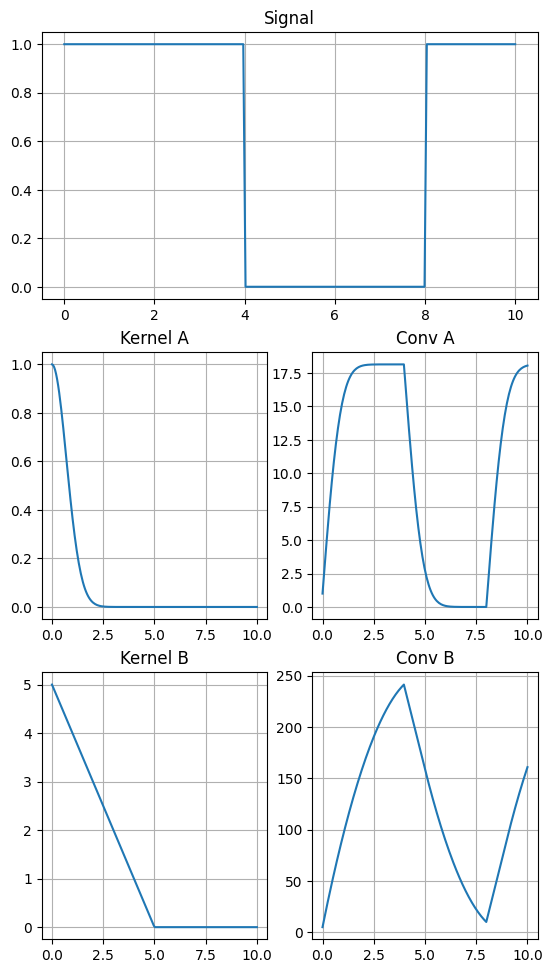

In [103]:
def exercise1() -> None:
    points_count = 200
    max_frequency = 20
    period = 1 / max_frequency

    def signal_float(x: float) -> float:
        return 1 if floor(x / 4) % 2 == 0 else 0

    signal = np.vectorize(signal_float)

    def kernel_a(x: ndarray[dtype]) -> ndarray[dtype]:
        return np.exp(-x ** 2)

    def kernel_b_float(x: float) -> float:
        y = -x + 5
        return y if y > 0 else 0

    kernel_b = np.vectorize(kernel_b_float)

    xs = np.linspace(0, points_count * period, points_count)
    ys = signal(xs)

    ys_kernel_a = kernel_a(xs)
    ys_kernel_b = kernel_b(xs)

    ys_conv_a = np.convolve(ys, ys_kernel_a)
    ys_conv_b = np.convolve(ys, ys_kernel_b)

    plt.subplot(3, 2, (1, 2))
    plt.title('Signal')
    plt.plot(xs, ys)
    plt.grid()

    plt.subplot(323)
    plt.title('Kernel A')
    plt.plot(xs, ys_kernel_a)
    plt.grid()

    plt.subplot(324)
    plt.title('Conv A')
    plt.plot(xs[:points_count], ys_conv_a[:points_count])
    plt.grid()

    plt.subplot(325)
    plt.title('Kernel B')
    plt.plot(xs, ys_kernel_b)
    plt.grid()

    plt.subplot(326)
    plt.title('Conv B')
    plt.plot(xs[:points_count], ys_conv_b[:points_count])
    plt.grid()

    plt.subplots_adjust(top=2)
    plt.show()


exercise1()

### Задания 2-3
Чтобы разобраться в алгоритме свертки двух сигналов – реализуйте свой алгоритм,
осуществляющий свертку сигнала с произвольным ядром.

Для любого выбранного Вами ядра свертки убедиться, что свертка во временной
области эквивалентна умножению в частотной области (теорема о свертке).

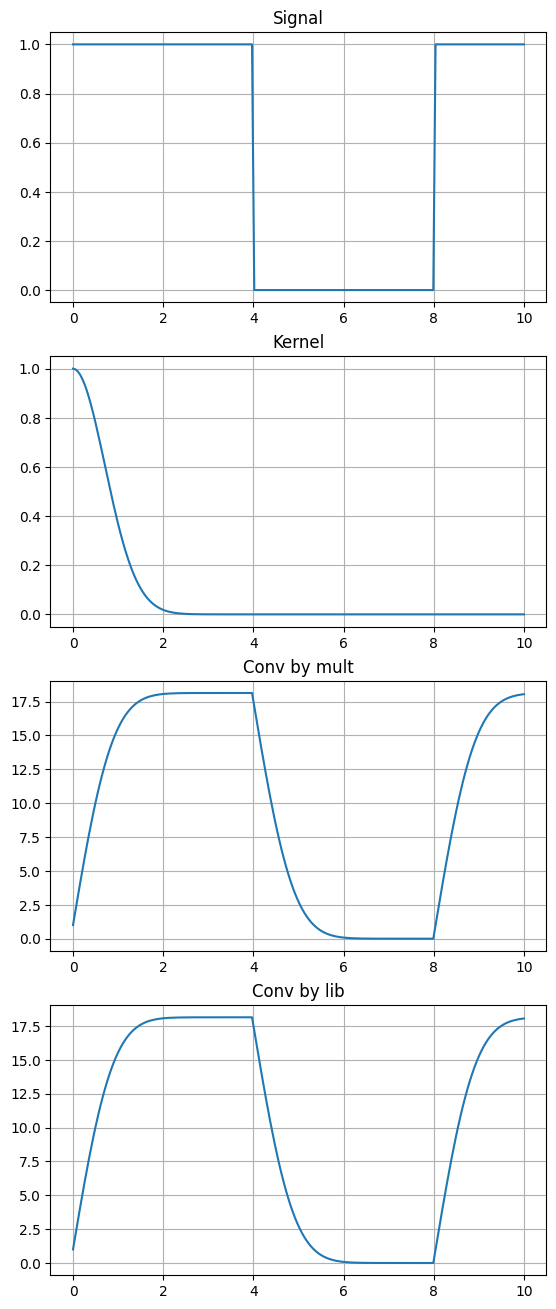

In [118]:
def exercise2() -> None:
    points_count = 200
    max_frequency = 20
    period = 1 / max_frequency

    def signal_float(x: float) -> float:
        return 1 if floor(x / 4) % 2 == 0 else 0

    signal = np.vectorize(signal_float)

    def kernel_a(x: ndarray[dtype]) -> ndarray[dtype]:
        return np.exp(-x ** 2)

    xs = np.linspace(0, points_count * period, points_count)
    ys = signal(xs)

    ys_kernel = kernel_a(xs)

    def convolve() -> ndarray[dtype]:
        ys_len, ys_kernel_len = len(ys), len(ys_kernel)
        ys_padded = np.append(ys, np.zeros(ys_len - 1))
        ys_kernel_padded = np.append(ys_kernel, np.zeros(ys_kernel_len - 1))
        ys_fft = fft(ys_padded)
        ys_kernel_fft = fft(ys_kernel_padded)
        ys_conv_fft = ys_fft * ys_kernel_fft
        return ifft(ys_conv_fft).real[:ys_len]

    ys_conv_by_mult = convolve()
    ys_conv_by_lib = np.convolve(ys, ys_kernel)

    plt.subplot(411)
    plt.title('Signal')
    plt.plot(xs, ys)
    plt.grid()

    plt.subplot(412)
    plt.title('Kernel')
    plt.plot(xs, ys_kernel)
    plt.grid()

    plt.subplot(413)
    plt.title('Conv by mult')
    plt.plot(xs[:points_count], ys_conv_by_mult[:points_count])
    plt.grid()

    plt.subplot(414)
    plt.title('Conv by lib')
    plt.plot(xs[:points_count], ys_conv_by_lib[:points_count])
    plt.grid()

    plt.subplots_adjust(top=2.7)
    plt.show()


exercise2()

### Задание 4
Разобраться в реализации свертки с ядром Гаусса для реализации
сглаживающего фильтра во временной области.

In [ ]:
def exercise4() -> None:
    pass


exercise4()

### Задание 5
Реализовать пункт 4 в частотной области. Убедиться, что результаты совпадают.
Настройте параметры ядра Гаусса таким образом, чтобы реализовать: (а) узкополосной
фильтр (б) фильтр нижних частот

In [ ]:
def exercise5() -> None:
    pass


exercise5()

### Задание 6
Реализовать полосовой фильтр, используя окно Планка.

In [ ]:
def exercise6() -> None:
    pass


exercise6()

### Задание 7
Сравнить результат фильтрации зашумленного сигнала при использовании ядра
Гаусса и окна Планка.

In [ ]:
def exercise7() -> None:
    pass


exercise7()